In [3]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.pipeline import Pipeline

#to data preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

#NLP tools
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

#train split and fit models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from nltk.tokenize import TweetTokenizer

#model selection
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix, classification_report


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Afaq_Lite\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
dataset = pd.read_csv('labeled_data.csv')
dataset.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [3]:
print(type (dataset))

<class 'pandas.core.frame.DataFrame'>


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [5]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,24783.0,12681.192027,7299.553863,0.0,6372.5,12703.0,18995.5,25296.0
count,24783.0,3.243473,0.883060,3.0,3.0,3.0,3.0,9.0
hate_speech,24783.0,0.280515,0.631851,0.0,0.0,0.0,0.0,7.0
offensive_language,24783.0,2.413711,1.399459,0.0,2.0,3.0,3.0,9.0
neither,24783.0,0.549247,1.113299,0.0,0.0,0.0,0.0,9.0
class,24783.0,1.110277,0.462089,0.0,1.0,1.0,1.0,2.0


In [6]:
print(dataset.isnull().sum())

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64


In [7]:
print(dataset.describe(include="object"))

                                                    tweet
count                                               24783
unique                                              24783
top     !!! RT @mayasolovely: As a woman you shouldn't...
freq                                                    1


In [8]:
print(dataset["tweet"].value_counts())

!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...          1
RT @MurderHigashi: I cannot be worried 'bout no bitch.                                                                                                1
RT @MrPerfect_22: Most of these niggas go broke for these hoes !!                                                                                     1
RT @MrPOONsoaker: Foh RT @Thotcho: @MrPOONsoaker lmao 6&#8242;0 but I&#8217;m hella skinny so bitches don&#8217;t like me                             1
RT @MrNationWide: fake eyelashes are okay if they look natural, but some of you bitches look like you gonna take flight if you blink too fa&#8230;    1
                                                                                                                                                     ..
But she can shade the shit out a bitch RT @axolROSE: #YourWifeCantRead                  

In [9]:
from textblob import TextBlob

In [10]:
dataset["lenght"] =dataset["tweet"].apply(len)

In [11]:
def get_polarity(text):
    textblob =TextBlob(str(text.encode("utf-8")))
    pol = textblob.sentiment.polarity
    return pol

In [12]:
def get_subjectivity(text):
    textblob =TextBlob(str(text.encode("utf-8")))
    pol = textblob.sentiment.subjectivity
    return pol

In [13]:
dataset["Polarity"] = dataset["tweet"].apply(get_polarity)
dataset["Subjectivity"] = dataset["tweet"].apply(get_subjectivity)

In [14]:
print(dataset[['lenght','Polarity','Subjectivity']])

       lenght  Polarity  Subjectivity
0         140  0.000000      0.000000
1          85 -1.000000      0.666667
2         120 -0.333333      0.700000
3          62  0.000000      0.000000
4         137  0.075000      0.725000
...       ...       ...           ...
24778     146  0.357143      0.535714
24779      70 -0.550000      0.900000
24780      67  0.156250      0.400000
24781      37  0.100000      0.400000
24782     127  0.187500      0.325000

[24783 rows x 3 columns]


In [15]:
dataset["charsCount"] = dataset["tweet"].apply(len)
dataset["wordCount"] = dataset["tweet"].apply(lambda x: len(x.split()))
dataset["wordDensity"] = dataset["charsCount"] / (dataset["wordCount"]+1)
print(dataset[['charsCount','wordCount','wordDensity']].describe())

         charsCount     wordCount   wordDensity
count  24783.000000  24783.000000  24783.000000
mean      85.436065     14.117016      5.699266
std       41.548238      6.825525      1.589478
min        5.000000      1.000000      1.750000
25%       52.000000      9.000000      4.777778
50%       81.000000     13.000000      5.375000
75%      119.000000     19.000000      6.250000
max      754.000000     52.000000     53.857143


In [16]:
# import list of punctuation
import string
punctuation = string.punctuation
dataset["punctuation_count"] = dataset["tweet"].apply(lambda x: len("".join(_ for _ in x if _ in punctuation)))
print(dataset["punctuation_count"].describe())

count    24783.000000
mean         6.348747
std          7.340411
min          0.000000
25%          2.000000
50%          4.000000
75%          8.000000
max        234.000000
Name: punctuation_count, dtype: float64


In [17]:
dt_transformed = dataset[['class', 'tweet']]
y = (dt_transformed.iloc[:, :-1].values).ravel()
dt_transformed

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,2,"you've gone and broke the wrong heart baby, an..."
24780,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,1,youu got wild bitches tellin you lies


In [18]:
#train_test_split
df_train, df_test = train_test_split(dt_transformed, test_size = 0.10, random_state = 42, stratify=dt_transformed['class'])
df_train.shape, df_test.shape

((22304, 2), (2479, 2))

In [19]:
# test and vaildition set 
df_train, df_vad = train_test_split(df_train, test_size = 0.10, random_state = 42, stratify=df_train['class'])
df_train.shape, df_vad.shape

((20073, 2), (2231, 2))

<AxesSubplot:>

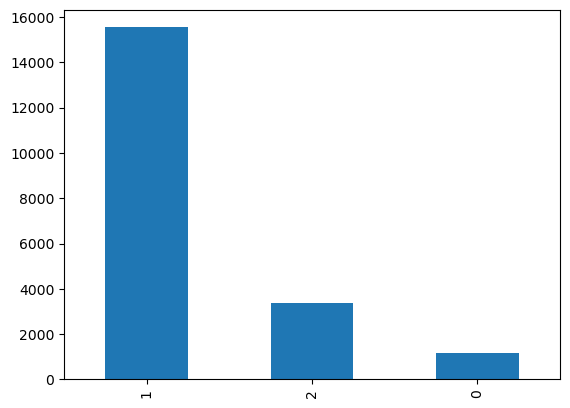

In [20]:
df_train['class'].value_counts().plot(kind='bar')

In [21]:
#Data Cleaning
def preprocessing(data):
    stemmer = nltk.stem.RSLPStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    corpus = []
    for tweet in data:
      review = re.sub(r"@[A-Za-z0-9_]+", " ", tweet)
      review = re.sub('RT', ' ', review)
      review = re.sub(r"https?://[A-Za-z0-9./]+", " ", review)
      review = re.sub(r"https?", " ", review)
      review = re.sub('[^a-zA-Z]', ' ', review)
      review = review.lower()
      review = review.split()
      ps = PorterStemmer()
      review = [ps.stem(word) for word in review if not word in set(all_stopwords) if len(word) > 2]
      review = ' '.join(review)
      corpus.append(review)

    return np.array(corpus)

In [22]:
nltk.download('rslp')

[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\Afaq_Lite\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [23]:
c_train = preprocessing(df_train['tweet'].values)
c_vad = preprocessing(df_vad['tweet'].values)

In [24]:
#Extracting features using tokenization
tweet_tokenizer = TweetTokenizer() 
vectorizer = CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize, max_features = 1010)
def tokenize(corpus, flag=0):

    if (flag):
        return vectorizer.fit_transform(corpus).toarray()
    else:
        return vectorizer.transform(corpus).toarray()

In [25]:
X_train = tokenize(c_train, 1)
X_vad = tokenize(c_vad, 0)
y_train = df_train['class'].values
y_vad = df_vad['class'].values
X_train.shape, X_vad.shape

((20073, 1010), (2231, 1010))

In [26]:
# Logistic Regression
model = LogisticRegression(multi_class='ovr', solver='liblinear', random_state = 0)
model.fit(X_train, y_train.ravel())
y_pred = model.predict(X_vad)

In [27]:
def set_confusion_matrix(clf, X, y, title):
    plot_confusion_matrix(clf, X, y)
    plt.title(title)
    plt.show()

C:\Users\Afaq_Lite\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


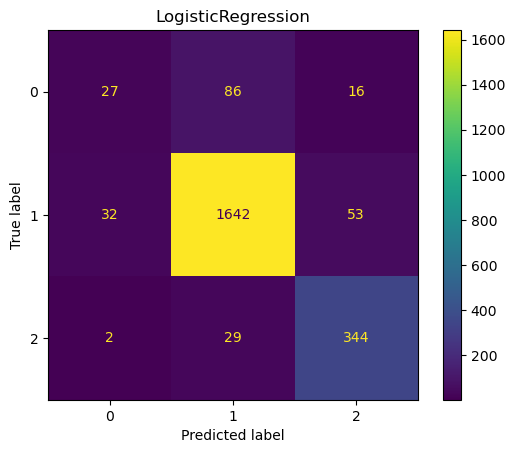

In [28]:
set_confusion_matrix(model, X_vad, y_vad, type(model).__name__)

In [29]:
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_vad, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.44      0.21      0.28       129
     class 1       0.93      0.95      0.94      1727
     class 2       0.83      0.92      0.87       375

    accuracy                           0.90      2231
   macro avg       0.74      0.69      0.70      2231
weighted avg       0.89      0.90      0.89      2231



In [30]:
#Analyzing better the words of each class
conjunto = c_train
hate_tweets = [sentence for sentence, label in zip(conjunto, y) if label == 0]
off_tweets = [sentence for sentence, label in zip(conjunto, y) if label == 1]
none_tweets = [sentence for sentence, label in zip(conjunto, y) if label == 2]

In [31]:
hate_words = ' '.join(hate_tweets)
off_words = ' '.join(off_tweets)
none_words = ' '.join(none_tweets)

In [32]:
def get_wordcloud(text):
    # Create and generate a word cloud image:
    wordcloud = WordCloud().generate(text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

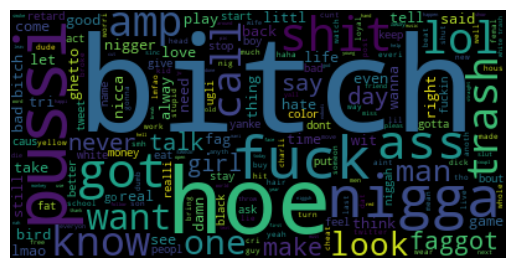

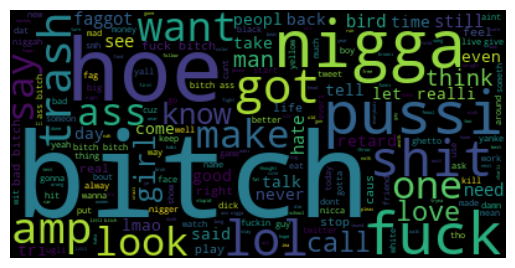

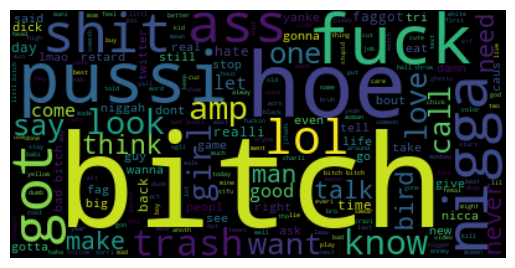

In [33]:
get_wordcloud(hate_words)
get_wordcloud(off_words)
get_wordcloud(none_words)

In [34]:
def wordListToFreqDict(wordlist):
    wordfreq = [(wordlist.count(p))/len(wordlist) for p in wordlist]
    return dict(list(zip(wordlist,wordfreq)))

In [35]:
def sortFreqDict(freqdict):
    aux = [(freqdict[key], key) for key in freqdict]
    aux.sort()
    aux.reverse()
    return aux

In [36]:
hate_dict = sortFreqDict(wordListToFreqDict(hate_words.split()))
off_dict = sortFreqDict(wordListToFreqDict(off_words.split()))
none_dict = sortFreqDict(wordListToFreqDict(none_words.split()))

In [37]:
len(hate_dict), len(off_dict), len(none_dict)

(2624, 11775, 5189)

In [38]:
#Getting common words
def get_common(wordlist, n):
    return ([w[1] for w in wordlist])[:n]

common_words = list()
common_words.append(get_common(hate_dict, 2000))
common_words.append(get_common(off_dict, 1000))
common_words.append(get_common(none_dict, 1000))
common_words = np.unique(np.hstack(common_words))

In [39]:
common_words_dict = ({i:j for i, j in zip(common_words, range(len(common_words)))})

In [40]:
X_train = tokenize(c_train, 1)
X_vad = tokenize(c_vad, 0)
X_train.shape, X_vad.shape

((20073, 1010), (2231, 1010))

In [41]:
# Logistic Regression
model = LogisticRegression(multi_class='ovr', solver='liblinear', random_state = 0)
model.fit(X_train, y_train.ravel())
y_pred = model.predict(X_vad)

C:\Users\Afaq_Lite\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


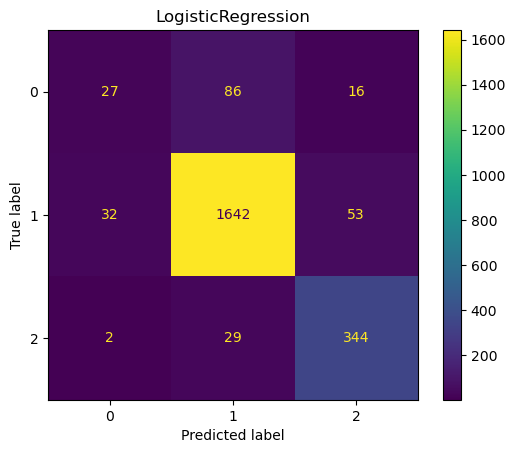

In [42]:
set_confusion_matrix(model, X_vad, y_vad, type(model).__name__)

In [43]:
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_vad, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.44      0.21      0.28       129
     class 1       0.93      0.95      0.94      1727
     class 2       0.83      0.92      0.87       375

    accuracy                           0.90      2231
   macro avg       0.74      0.69      0.70      2231
weighted avg       0.89      0.90      0.89      2231



In [44]:
n_off, n_none, n_hate = df_train['class'].value_counts()
n_hate, n_off, n_none 

(1158, 15543, 3372)

In [45]:
df_hate = df_train[df_train['class'] == 0]
df_off = df_train[df_train['class'] == 1]
df_none = df_train[df_train['class'] == 2]

In [46]:
df_off_under = df_off.sample(n_hate, random_state=0)
df_none_under = df_none.sample(n_hate, random_state=0)

df_under = pd.concat([df_hate, df_off_under, df_none_under], axis=0)
print(df_under['class'].value_counts())

0    1158
1    1158
2    1158
Name: class, dtype: int64


In [47]:
c_train = preprocessing(df_under['tweet'].values)
c_vad = preprocessing(df_vad['tweet'].values)

In [48]:
X_train = tokenize(c_train, 1)
X_vad = tokenize(c_vad, 0)
y_train = df_under['class'].values
y_vad = df_vad['class'].values
X_train.shape, X_vad.shape

((3474, 1010), (2231, 1010))

In [49]:
# Logistic Regression
model_under = LogisticRegression(multi_class='ovr', solver='liblinear', random_state = 0)
model_under.fit(X_train, y_train.ravel())
y_pred = model_under.predict(X_vad)

C:\Users\Afaq_Lite\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


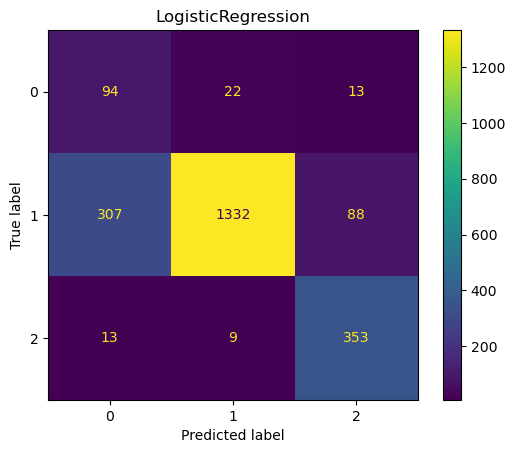

In [50]:
set_confusion_matrix(model_under, X_vad, y_vad, type(model_under).__name__)

In [51]:
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_vad, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.23      0.73      0.35       129
     class 1       0.98      0.77      0.86      1727
     class 2       0.78      0.94      0.85       375

    accuracy                           0.80      2231
   macro avg       0.66      0.81      0.69      2231
weighted avg       0.90      0.80      0.83      2231



In [52]:
n_off, n_none, n_hate = df_train['class'].value_counts()
n_hate, n_off, n_none 

(1158, 15543, 3372)

In [53]:
df_hate_over = df_hate.sample(n_off, replace=True, random_state=0)
df_none_over = df_none.sample(n_off, replace=True, random_state=0)
df_over = pd.concat([df_off, df_hate_over, df_none_over], axis=0)

print('Random over-sampling:')
print(df_over['class'].value_counts())

Random over-sampling:
1    15543
0    15543
2    15543
Name: class, dtype: int64


In [54]:
c_train = preprocessing(df_over['tweet'].values)
c_vad = preprocessing(df_vad['tweet'].values)

In [55]:
X_train = tokenize(c_train, 1)
X_vad = tokenize(c_vad, 0)
y_train = df_over['class'].values
y_vad = df_vad['class'].values
X_train.shape, X_vad.shape

((46629, 1010), (2231, 1010))

In [56]:
# Logistic Regression
model_over = LogisticRegression(multi_class='ovr', solver='liblinear', random_state = 0)
model_over.fit(X_train, y_train.ravel())
y_pred = model_over.predict(X_vad)

C:\Users\Afaq_Lite\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


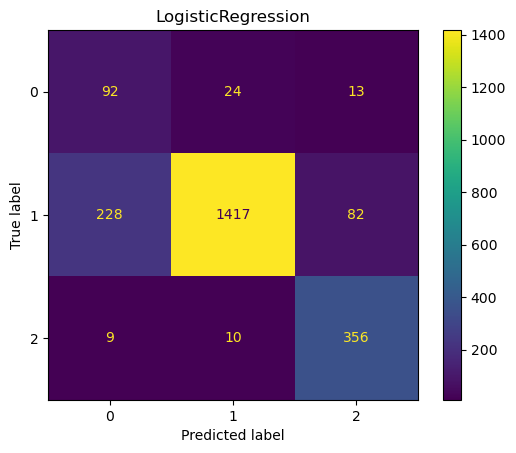

              precision    recall  f1-score   support

     class 0       0.28      0.71      0.40       129
     class 1       0.98      0.82      0.89      1727
     class 2       0.79      0.95      0.86       375

    accuracy                           0.84      2231
   macro avg       0.68      0.83      0.72      2231
weighted avg       0.90      0.84      0.86      2231



In [57]:
set_confusion_matrix(model_over, X_vad, y_vad, type(model_over).__name__)
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_vad, y_pred, target_names=target_names))

In [58]:
c_test = preprocessing(df_test['tweet'].values)

c_test.shape

(2479,)

In [59]:
X_test = tokenize(c_test, 0)
y_test = df_test['class']

X_test.shape, y_test.shape

((2479, 1010), (2479,))

C:\Users\Afaq_Lite\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


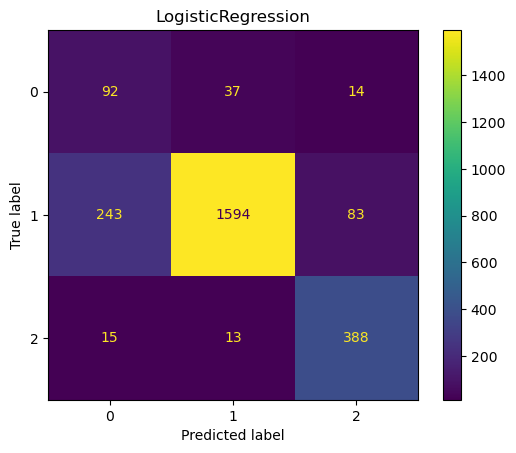

              precision    recall  f1-score   support

     class 0       0.26      0.64      0.37       143
     class 1       0.97      0.83      0.89      1920
     class 2       0.80      0.93      0.86       416

    accuracy                           0.84      2479
   macro avg       0.68      0.80      0.71      2479
weighted avg       0.90      0.84      0.86      2479



In [60]:
y_pred = model_over.predict(X_test)
set_confusion_matrix(model_over, X_test, y_test, type(model_over).__name__)
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, y_pred, target_names=target_names))

In [61]:
import joblib

In [62]:
#joblib.dump(model_over, 'NLP_Model.h5')

In [63]:
joblib.dump(model_over, 'NLP_Model_2.joblib')

['NLP_Model_2.joblib']

In [64]:
model = joblib.load('NLP_Model_2.joblib')

In [65]:
from joblib import dump, load

# Save model
dump(model_over, 'NLP_Model_2.joblib')

['NLP_Model_2.joblib']

In [66]:
print(model_over.coef_)  
print(model_over.intercept_)

loaded_model = load('NLP_Model_2.joblib')
print(loaded_model.coef_)
print(loaded_model.intercept_)

[[-1.76843304 -0.34432536  1.50735528 ...  0.47821533 -0.19904494
  -2.33996818]
 [-1.58686961 -0.43528304 -1.50925107 ... -0.21577491 -1.91081405
  -2.07671963]
 [ 1.7113922   1.19162372 -0.68116524 ... -0.96280681  0.9803514
   2.48881859]]
[-2.20228722 -0.91573394  1.65801663]
[[-1.76843304 -0.34432536  1.50735528 ...  0.47821533 -0.19904494
  -2.33996818]
 [-1.58686961 -0.43528304 -1.50925107 ... -0.21577491 -1.91081405
  -2.07671963]
 [ 1.7113922   1.19162372 -0.68116524 ... -0.96280681  0.9803514
   2.48881859]]
[-2.20228722 -0.91573394  1.65801663]


In [67]:
original_predictions = model_over.predict(X_test)

loaded_model = load('NLP_Model_2.joblib')
new_predictions = loaded_model.predict(X_test)

np.allclose(original_predictions, new_predictions)

True

In [68]:
from sklearn.metrics import log_loss

original_loss = log_loss(y_test, model_over.predict_proba(X_test))

loaded_model = load('NLP_Model_2.joblib')  
new_loss = log_loss(y_test, loaded_model.predict_proba(X_test))

original_loss == new_loss

True

In [69]:
num_features = model.coef_.shape[1]
class_labels = model.classes_

print("Input shape: (samples, features) =", (None, num_features))
print("Output classes:", class_labels)

Input shape: (samples, features) = (None, 1010)
Output classes: [0 1 2]


In [70]:
import joblib

# Load the model
model = joblib.load('NLP_Model_2.joblib')

# Check the input shape
input_shape = model.coef_.shape
print('Input shape:', input_shape)

# Check the output shape
output_shape = model.classes_.shape
print('Output shape:', output_shape)


Input shape: (3, 1010)
Output shape: (3,)


In [71]:
new_text = "ahmed khalifa ahmed khalifa  "

clean_text = preprocessing([new_text])[0]

X_new = tokenize([clean_text], 0)

pred = loaded_model.predict(X_new)[0]

print(f"Predicted class: {pred}")

Predicted class: 2


In [72]:
input_shape = X_new.shape

In [73]:
print(f"Input shape: {input_shape}")   


Input shape: (1, 1010)


In [74]:
X_new[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [75]:
len(X_new[0])

1010

In [76]:
loaded_model.coef_ 
loaded_model.intercept_

array([-2.20228722, -0.91573394,  1.65801663])

In [77]:
print(loaded_model)

LogisticRegression(multi_class='ovr', random_state=0, solver='liblinear')


In [80]:
import pickle

# Save the logistic regression model and vectorizer together
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump((model_over, vectorizer), file)

